In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.datasets import mnist
from keras.utils import np_utils
nb_classes = 10

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [6]:
# normalize inputs from 0-255 to 0-1
# Put everything on grayscale
X_train = X_train / 255
X_test = X_test / 255

In [7]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
X_train[0].shape

(784,)

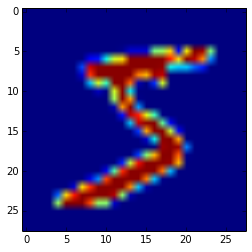

In [9]:
plt.imshow(X_train[0].reshape(28, 28))

In [10]:
print(np.asarray(range(10)))
print(y_train[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 1 0 0 0 0]


In [11]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [12]:
#Define model architecture
network_history = model.fit(X_train, y_train, epochs=5, batch_size=200, verbose=2)

Epoch 1/5
 - 11s - loss: 0.2438 - acc: 0.9295
Epoch 2/5
 - 10s - loss: 0.0853 - acc: 0.9745
Epoch 3/5
 - 9s - loss: 0.0542 - acc: 0.9829
Epoch 4/5
 - 8s - loss: 0.0359 - acc: 0.9887
Epoch 5/5
 - 9s - loss: 0.0280 - acc: 0.9908


In [13]:
# Evaluate model on test data
scores = model.evaluate(X_test, y_test, verbose=0)
print scores
print("Error: %.2f%%" % (100-scores[1]*100))

[0.078520905826939269, 0.97670000000000001]
Error: 2.33%


In [14]:
y_predict = model.predict(X_train[:2])
y_predict

array([[  1.23385135e-13,   9.17479159e-09,   2.66384362e-11,
          1.00171920e-02,   7.33203693e-19,   9.89982784e-01,
          4.10378925e-14,   1.65994388e-11,   1.51211127e-11,
          5.54676705e-09],
       [  9.99998927e-01,   4.13386131e-10,   1.09729444e-06,
          8.00960756e-11,   1.25439643e-12,   4.35407738e-10,
          1.14491050e-09,   1.22051009e-08,   3.48864236e-11,
          5.59389832e-08]], dtype=float32)

In [15]:
print np.argmax(y_predict[0]), np.argmax(y_train[0])

5 5


(1, 784)


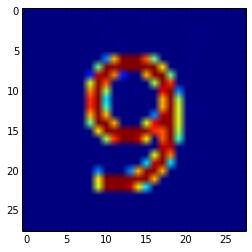

In [27]:
from keras.preprocessing.image import img_to_array, load_img

img = load_img('data/9.jpg', grayscale=True, target_size=(28, 28))
img_arr = img_to_array(img)
img_arr = img_arr.reshape(1, num_pixels).astype('float32') / 255
plt.imshow(img_arr.reshape(28, 28))

print img_arr.shape

In [28]:
y_p = model.predict(img_arr)
y_p

array([[  7.19385014e-08,   4.23433910e-09,   1.31915499e-07,
          2.28173139e-05,   1.73359313e-05,   1.99150381e-05,
          1.65771985e-09,   1.83445366e-06,   6.28799114e-07,
          9.99937296e-01]], dtype=float32)

In [29]:
print np.argmax(y_p[0])

9


In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
